In [ ]:
pip install tensorflow



SyntaxError: invalid syntax (<ipython-input-2-13e4649a079f>, line 1)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example data loading and preprocessing (MNIST dataset for demonstration)
from tensorflow.keras.datasets import mnist

In [ ]:
# import data
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

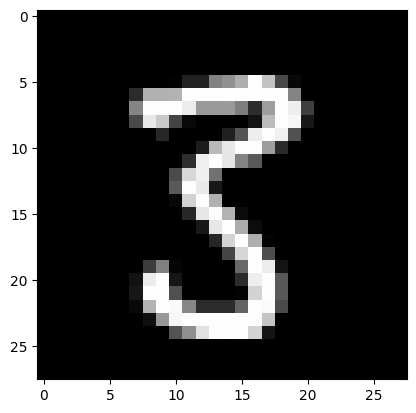

In [ ]:
# first, let‘s generate a random number with numpy random, so everytime we get a different image
random_nr = np.random.randint(0, 60000)

# now, let‘s use imshow() to visualize the random number from our train dataset
plt.imshow(X_train[random_nr], cmap="gray");

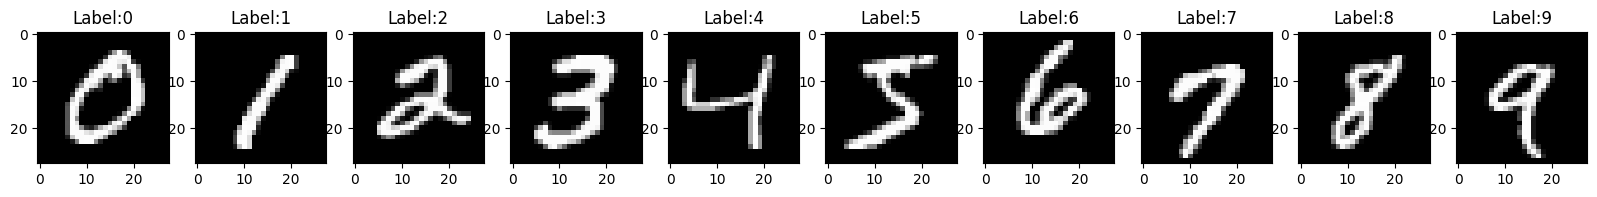

In [ ]:
# Let‘s visualize one example per each digit using a for loop and matplotlib subplot
num_classes = 10

# Create a subplot
fig, ax = plt.subplots(1, num_classes, figsize=(20,20)) # 1 row, 10 columns (num_classes)

# Loop through 10 classes from train dataset and add labels from test dataset
for i in range(num_classes):
  sample = X_train[y_train == i][0]
  ax[i].imshow(sample, cmap="gray")
  ax[i].set_title(f"Label:{i}")

In [ ]:
# encode labels
import tensorflow as tensorflow

y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
# normalize the images
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
# reshape data
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
#instanitiating the model
model = Sequential()

model.add(Dense(units=128, input_shape=(784, ), activation="relu"))
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics="accuracy")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# training the model
BATCH_SIZE = 512
epochs = 11
model.fit(x=X_train, y=y_train, batch_size = BATCH_SIZE, epochs = epochs )

Epoch 1/11
118/118 [==============================] - 1s 11ms/step - loss: 0.0426 - accuracy: 0.9869
Epoch 2/11
118/118 [==============================] - 1s 11ms/step - loss: 0.0382 - accuracy: 0.9884
Epoch 3/11
118/118 [==============================] - 2s 15ms/step - loss: 0.0340 - accuracy: 0.9893
Epoch 4/11
118/118 [==============================] - 2s 17ms/step - loss: 0.0299 - accuracy: 0.9908
Epoch 5/11
118/118 [==============================] - 2s 16ms/step - loss: 0.0277 - accuracy: 0.9919
Epoch 6/11
118/118 [==============================] - 1s 11ms/step - loss: 0.0238 - accuracy: 0.9927
Epoch 7/11
118/118 [==============================] - 1s 11ms/step - loss: 0.0224 - accuracy: 0.9929
Epoch 8/11
118/118 [==============================] - 1s 11ms/step - loss: 0.0217 - accuracy: 0.9934
Epoch 9/11
118/118 [==============================] - 1s 11ms/step - loss: 0.0193 - accuracy: 0.9943
Epoch 10/11
118/118 [==============================] - 1s 11ms/step - loss: 0.0162 - accura

In [ ]:
# Evaluate train and test
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

# Print results
print(f"Train Loss: {train_loss}, Train Accuracy: {train_acc}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0711 - accuracy: 0.9775
Train Loss: 0.031586453318595886, Train Accuracy: 0.9912166595458984
Test Loss: 0.07107054442167282, Test Accuracy: 0.9775000214576721


In [ ]:
# Predict labels on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) # pick the highest probability with "np.argmax()", and turn it into an index uing "axis=1"

# print vector of probabilities
print(f"What Softmax predicted: {y_pred}")

# print predicted number
print(f"What Softmax actually means: {y_pred_classes}")

313/313 [==============================] - 1s 2ms/step
What Softmax predicted: [[4.53660186e-06 1.19757942e-06 3.21017324e-05 ... 9.99692917e-01
  3.53081333e-07 1.10621031e-05]
 [4.37113812e-08 1.82667864e-04 9.99811649e-01 ... 2.57974655e-08
  2.85166857e-06 8.61682774e-12]
 [1.82682652e-05 9.97354150e-01 4.42835386e-04 ... 4.97131899e-04
  1.02747546e-03 4.81726465e-06]
 ...
 [1.31263708e-10 1.76632342e-09 1.11686715e-10 ... 4.68191683e-06
  1.23136758e-07 6.20256469e-05]
 [2.78859869e-08 3.70783598e-10 2.58008753e-10 ... 1.27249433e-10
  3.51956842e-05 9.82824155e-10]
 [3.42356572e-07 1.03620656e-09 2.99122282e-09 ... 3.59864092e-12
  3.29041416e-09 4.30282587e-10]]
What Softmax actually means: [7 2 1 ... 4 5 6]


In [ ]:
# choose a random sample from all the test data
random_num = np.random.choice(len(X_test))
X_sample = X_test[random_num]

# save true label of this sample in a variable
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_num]

# save a predicted label of this sample in a variable
y_sample_pred_class = y_pred_classes[random_num]

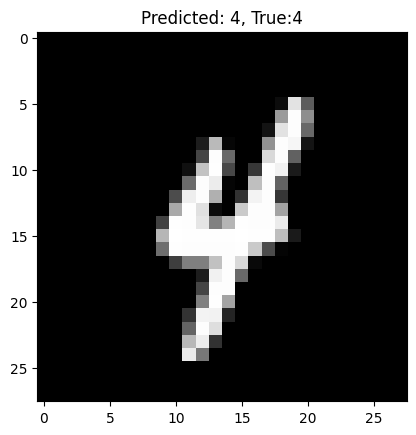

In [ ]:
# visualize
plt.title(f"Predicted: {y_sample_pred_class}, True:{y_sample_true}")
plt.imshow(X_sample.reshape(28, 28), cmap="gray");

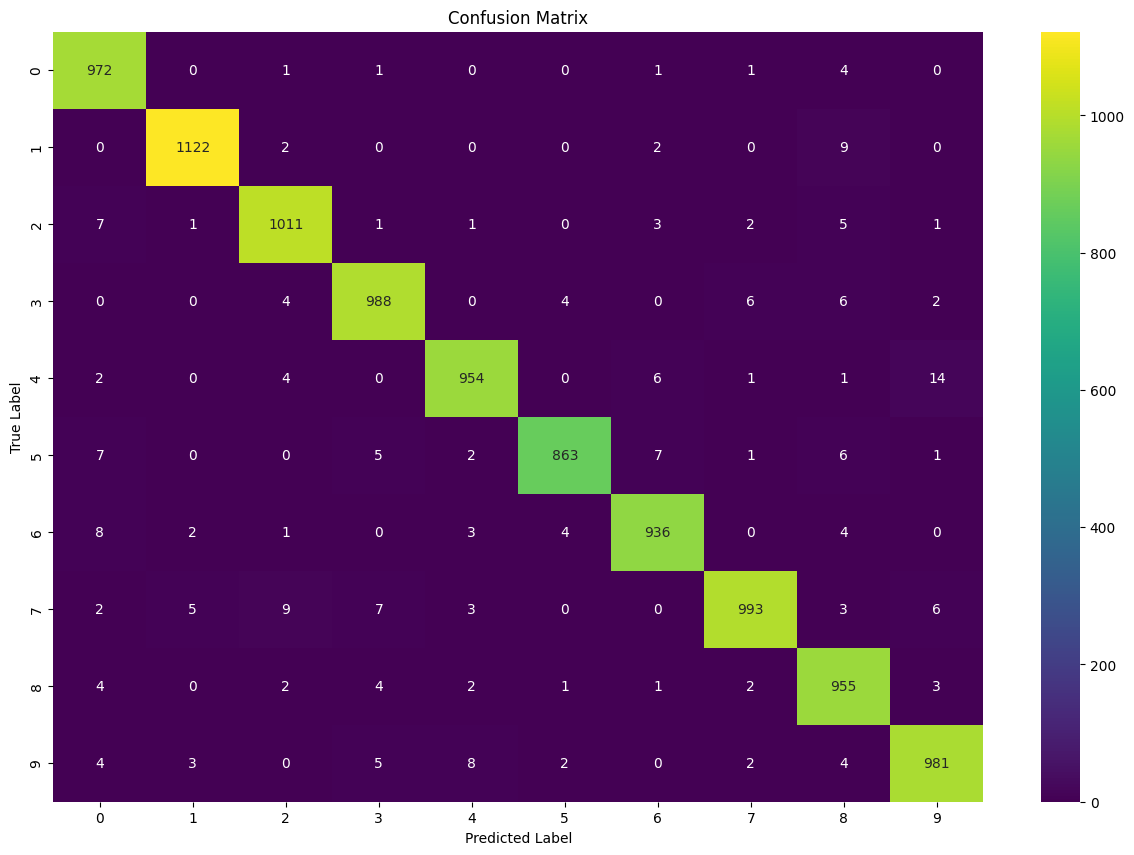

In [ ]:
# generate a confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# visualize confusion matrix with matplotlib and seaborn
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt="d", ax=ax, cmap="viridis")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_title("Confusion Matrix");